# Prevendo os sobreviventes do Titanic
# Modelo 1

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

## Visualização e Análise descritiva dos dados

In [129]:
treino = pd.read_csv(r'C:\Users\Lenovo\Documents\MeusProjetos\Data-Science\Titanic\train.csv')
teste = pd.read_csv(r'C:\Users\Lenovo\Documents\MeusProjetos\Data-Science\Titanic\test.csv')

treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [130]:
treino.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [131]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Preparando o modelo com as colunas Pclass, Sex, Age, SibSp e Parch

In [132]:
variaveis_treino = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Survived']
variaveis_teste = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']

In [133]:
treino1 = treino[variaveis_treino].copy()
treino1['Sex_numerico'] = treino1['Sex'].apply(lambda x: 1 if x == 'female' else 0)
teste1 = teste[variaveis_teste].copy()
teste1['Sex_numerico'] = teste1['Sex'].apply(lambda x: 1 if x == 'female' else 0)

In [134]:
print(treino1.isnull().sum())

Pclass            0
Sex               0
Age             177
SibSp             0
Parch             0
Survived          0
Sex_numerico      0
dtype: int64


In [135]:
def preenche_nan(df, valor):
    df = df.fillna(valor)

    return df

treino1 = preenche_nan(treino1, -1)
teste1 = preenche_nan(teste1, -1)
treino1

,Pclass,Sex,Age,SibSp,Parch,Survived,Sex_numerico
0,3,male,22.0,1,0,0,0
1,1,female,38.0,1,0,1,1
2,3,female,26.0,0,0,1,1
3,1,female,35.0,1,0,1,1
4,3,male,35.0,0,0,0,0
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,0,0
887,1,female,19.0,0,0,1,1
888,3,female,-1.0,1,2,0,1
889,1,male,26.0,0,0,1,0


In [136]:
print(treino1.isnull().sum())

Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Survived        0
Sex_numerico    0
dtype: int64


## Criando o modelo com vizinhos = 3

In [137]:
knn = KNeighborsClassifier(n_neighbors=3)

In [138]:
X_treino = treino1.drop(columns=['Sex', 'Survived'])
y_treino = treino1['Survived']

X_teste = teste1.drop(columns=['Sex'])

In [139]:
X_teste.head()

,Pclass,Age,SibSp,Parch,Sex_numerico
0,3,34.5,0,0,0
1,3,47.0,1,0,1
2,2,62.0,0,0,0
3,3,27.0,0,0,0
4,3,22.0,1,1,1


In [140]:
knn.fit(X_treino, y_treino)

y_pred = knn.predict(X_teste)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

## Arquivo de submissão

In [141]:
sub = pd.Series(y_pred, index=teste['PassengerId'], name='Survived')
sub.shape

(418,)

In [142]:
sub.to_csv('Primeiro_modelo.csv', header=True)

# Modelo 2

In [143]:
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import train_test_split 


## Verificando a melhor profundidade

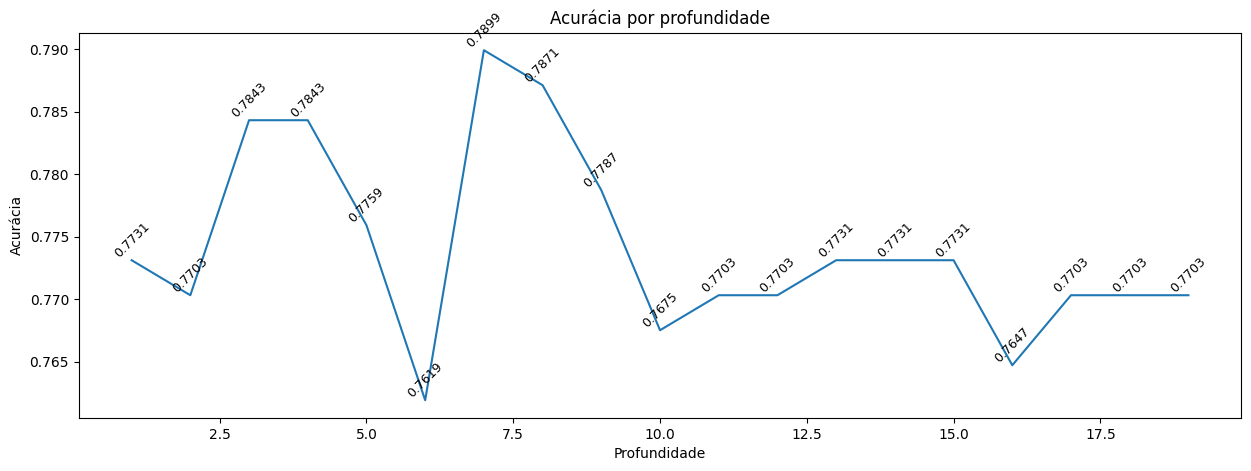

In [144]:
X_treino, X_valid, y_treino, y_valid = train_test_split(treino1.drop(columns=['Sex', 'Survived']), 
                                                        treino1['Survived'], 
                                                        test_size=0.4, 
                                                        random_state=42)


lista_acuracia = []

for depth in range(1, 20):
    modelo2 = DecisionTreeClassifier(random_state=42, max_depth=depth)
    modelo2.fit(X_treino, y_treino)
    pred = modelo2.predict(X_valid)
    accur = accuracy_score(pred, y_valid)
    lista_acuracia.append(accur)


plt.figure(figsize=(15,5))
plt.plot(range(1, len(lista_acuracia) + 1), lista_acuracia)
plt.xlabel('Profundidade')
plt.ylabel('Acurácia')
plt.title('Acurácia por profundidade')

# Adicionando os valores de acurácia em cada ponto
for i, acc in enumerate(lista_acuracia, start=1):
    plt.text(i, acc, f'{acc:.4f}', fontsize=9, ha='center', va='bottom', rotation=45)
plt.show()    #profundidade 7 apresentou maior valor

## Verificando o melhor número de folhas

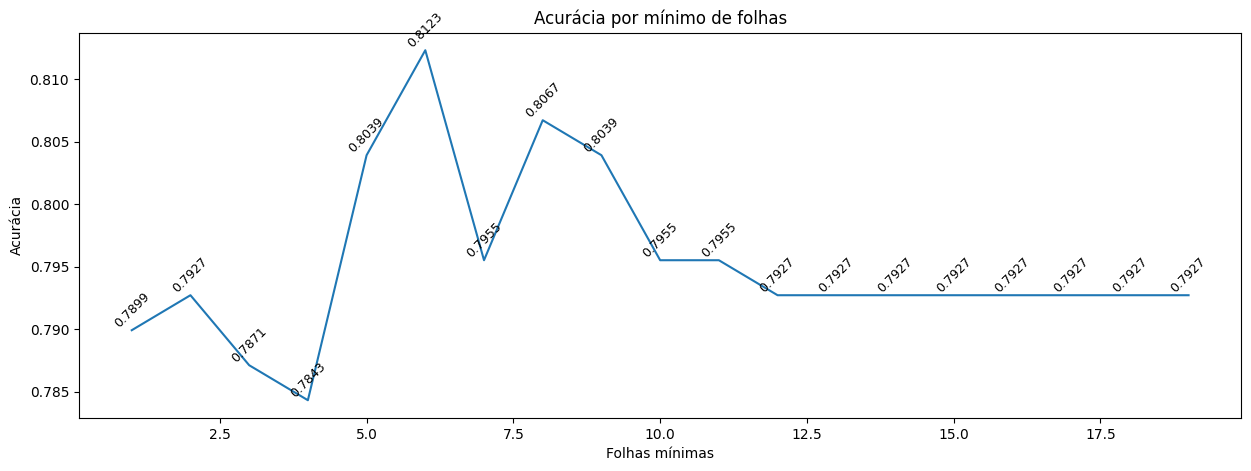

In [145]:
lista_acuracia = []

for leaf in range(1, 20):
    modelo2 = DecisionTreeClassifier(random_state=42, min_samples_leaf=leaf, max_depth=7)
    modelo2.fit(X_treino, y_treino)
    pred = modelo2.predict(X_valid)
    accur = accuracy_score(pred, y_valid)
    lista_acuracia.append(accur)


plt.figure(figsize=(15,5))
plt.plot(range(1, len(lista_acuracia) + 1), lista_acuracia)
plt.xlabel('Folhas mínimas')
plt.ylabel('Acurácia')
plt.title('Acurácia por mínimo de folhas')

# Adicionando os valores de acurácia em cada ponto
for i, acc in enumerate(lista_acuracia, start=1):
    plt.text(i, acc, f'{acc:.4f}', fontsize=9, ha='center', va='bottom', rotation=45)
plt.show()   #minimo de 6 folhas foi melhor

In [146]:
X_treino = treino1.drop(columns=['Sex', 'Survived'])
y_treino = treino1['Survived']

X_teste = teste1.drop(columns=['Sex'])

modelo2 = DecisionTreeClassifier(max_depth=7, min_samples_leaf=6, random_state=42)
modelo2.fit(X_treino, y_treino)
y_pred2 = modelo2.predict(X_teste)
y_pred2


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Segundo arquivo de submissão

In [147]:
sub = pd.Series(y_pred2, index=teste['PassengerId'], name='Survived')
sub.shape

(418,)

In [148]:
sub.to_csv('Segundo_modelo.csv', header=True)

# Terceiro modelo

In [149]:
treino

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [150]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
treino['Embarked'] = label_encoder.fit_transform(treino['Embarked'])
treino['Sex'] = label_encoder.fit_transform(treino['Sex'])
treino

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0


In [151]:
features3 = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']
treino3 = treino[features3]
treino3.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,22.0,1,0,7.2500,2,0
1,1,0,38.0,1,0,71.2833,0,1
2,3,0,26.0,0,0,7.9250,2,1
3,1,0,35.0,1,0,53.1000,2,1
4,3,1,35.0,0,0,8.0500,2,0


## Normalizar a coluna Fare

In [152]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,50))

#treino3['Fare'] = scaler.fit_transform(treino3[['Fare']]).copy()
treino3[['Fare', 'Age']] = scaler.fit_transform(treino3[['Fare', 'Age']]).copy()

treino3

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12192\40112041.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino3[['Fare', 'Age']] = scaler.fit_transform(treino3[['Fare', 'Age']]).copy()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,13.558683,1,0,0.707553,2,0
1,1,0,23.611460,1,0,6.956787,0,1
2,3,0,16.071877,0,0,0.773428,2,1
3,1,0,21.726564,1,0,5.182215,2,1
4,3,1,21.726564,0,0,0.785628,2,0
...,...,...,...,...,...,...,...,...
886,2,1,16.700176,0,0,1.268716,2,0
887,1,0,11.673787,0,0,2.927805,2,1
888,3,0,NaN,1,2,2.288568,2,0
889,1,1,16.071877,0,0,2.927805,0,1


In [153]:
treino3.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
Survived      0
dtype: int64

In [154]:
treino3['Age'].fillna(np.mean(treino3['Age']), inplace=True)

treino3.isna().sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12192\2030604895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino3['Age'].fillna(np.mean(treino3['Age']), inplace=True)


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [155]:
def verifica_param(df, alvo, tam_teste, n_amostras=10, profundidade=True, folhas=True):

    X_treino, X_valid, y_treino, y_valid = train_test_split(df.drop(columns=[alvo]), 
                                                            df[alvo], 
                                                            test_size=tam_teste, 
                                                            random_state=42)

    if profundidade == True:
        lista_acuracia = []

        for depth in range(1, n_amostras):
            modelo = DecisionTreeClassifier(random_state=42, max_depth=depth)
            modelo.fit(X_treino, y_treino)
            pred = modelo.predict(X_valid)
            accur = accuracy_score(pred, y_valid)
            lista_acuracia.append(accur)


        plt.figure(figsize=(15,5))
        plt.plot(range(1, len(lista_acuracia) + 1), lista_acuracia)
        plt.xlabel('Profundidade')
        plt.ylabel('Acurácia')
        plt.title('Acurácia por profundidade')

        # Adicionando os valores de acurácia em cada ponto
        for i, acc in enumerate(lista_acuracia, start=1):
            plt.text(i, acc, f'{acc:.4f}', fontsize=9, ha='center', va='bottom', rotation=45)
        plt.show()

    if folhas == True:
        lista_acuracia = []

        for leafs in range(1, n_amostras):
            modelo = DecisionTreeClassifier(random_state=42, min_samples_leaf=leafs)
            modelo.fit(X_treino, y_treino)
            pred = modelo.predict(X_valid)
            accur = accuracy_score(pred, y_valid)
            lista_acuracia.append(accur)


        plt.figure(figsize=(15,5))
        plt.plot(range(1, len(lista_acuracia) + 1), lista_acuracia)
        plt.xlabel('Número de folhas')
        plt.ylabel('Acurácia')
        plt.title('Acurácia por número de folhas')

        # Adicionando os valores de acurácia em cada ponto
        for i, acc in enumerate(lista_acuracia, start=1):
            plt.text(i, acc, f'{acc:.4f}', fontsize=9, ha='center', va='bottom', rotation=45)
        plt.show()

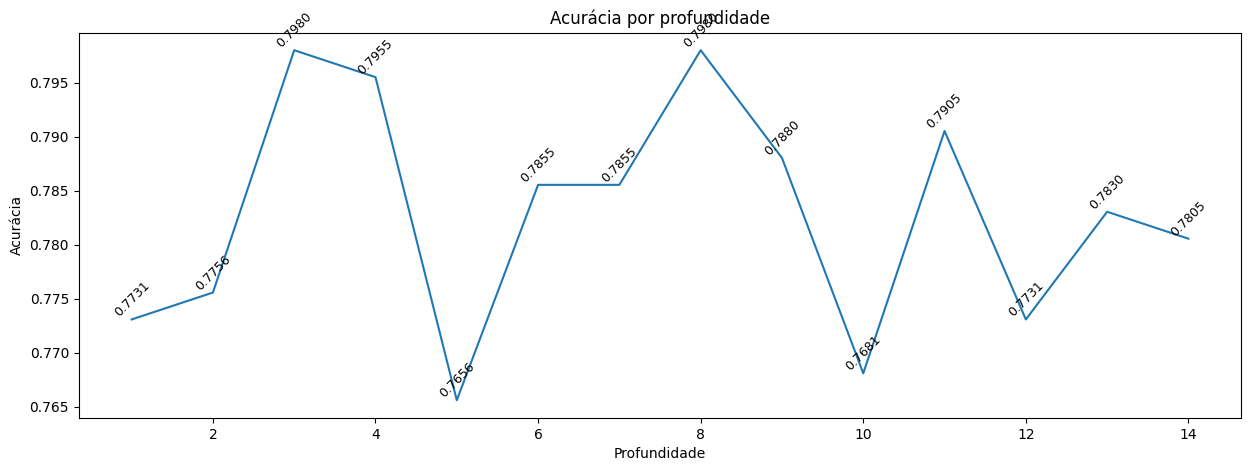

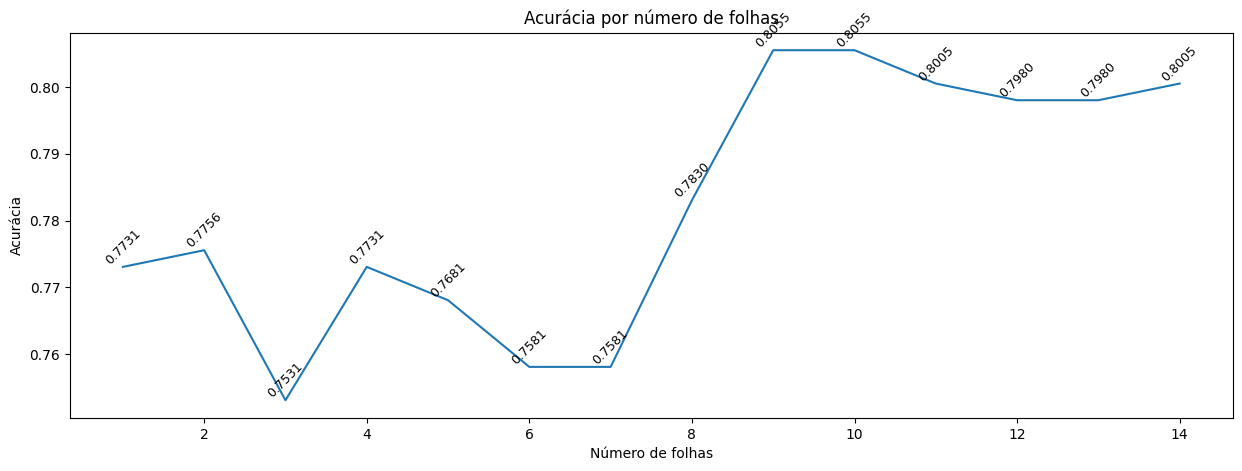

In [156]:
verifica_param(treino3, alvo='Survived', tam_teste=0.45, n_amostras=15)

### Escolhida profundidade 8 e folhas 9

In [157]:
features_teste3 = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

teste3 = teste[features_teste3]

In [158]:
teste3['Embarked'] = label_encoder.fit_transform(teste3['Embarked'])
teste3['Sex'] = label_encoder.fit_transform(teste3['Sex'])
teste3

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12192\20819272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste3['Embarked'] = label_encoder.fit_transform(teste3['Embarked'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12192\20819272.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste3['Sex'] = label_encoder.fit_transform(teste3['Sex'])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,NaN,0,0,8.0500,2


In [159]:
teste3[['Fare', 'Age']] = scaler.fit_transform(teste3[['Fare', 'Age']]).copy()
teste3

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12192\843936488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste3[['Fare', 'Age']] = scaler.fit_transform(teste3[['Fare', 'Age']]).copy()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.636160,0,0,0.764079,1
1,3,0,30.878280,1,0,0.683155,2
2,2,1,40.768825,0,0,0.945437,1
3,3,1,17.690888,0,0,0.845404,2
4,3,0,14.394039,1,1,1.199180,2
...,...,...,...,...,...,...,...
413,3,1,NaN,0,0,0.785628,2
414,1,0,25.603323,0,0,10.627932,0
415,3,1,25.273638,0,0,0.707553,2
416,3,1,NaN,0,0,0.785628,2


In [160]:
teste3['Age'].fillna(np.mean(teste3['Age']), inplace=True)
teste3['Fare'].fillna(np.mean(teste3['Fare']), inplace=True)

teste3.isna().sum()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12192\142426869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste3['Age'].fillna(np.mean(teste3['Age']), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12192\142426869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste3['Fare'].fillna(np.mean(teste3['Fare']), inplace=True)


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [161]:
modelo3 = DecisionTreeClassifier(random_state=42, max_depth=8, min_samples_leaf=9)

X_treino = treino3.drop(columns=['Survived'])
y_treino = treino3['Survived']

modelo3.fit(X_treino, y_treino)

X_teste = teste3

y_pred3 = modelo3.predict(X_teste)

y_pred3

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Terceiro arquivo de submissão

In [162]:
sub = pd.Series(y_pred3, index=teste['PassengerId'], name='Survived')
sub.shape

(418,)

In [163]:
sub.to_csv('Terceiro_modelo.csv', header=True)